In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv('Customer-Churn-Records.csv')
#drop useless column
ds=data.drop(['RowNumber', 'CustomerId','Surname'], axis=1)
ds

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [3]:
#For quantitative data
des=ds.describe()

#find range and quartile deviation
des.loc['range']=des.loc['max']-des.loc['min']
des.loc['IQR']=des.loc['75%']-des.loc['25%']

#variance
des.loc['variance']=ds.var()
#skew
des.loc['skew']=ds.skew()

des

C:\Users\User\AppData\Local\Temp/ipykernel_31384/1357965516.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  des.loc['variance']=ds.var()
C:\Users\User\AppData\Local\Temp/ipykernel_31384/1357965516.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  des.loc['skew']=ds.skew()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,7.648589e+04,1.530200,0.705500,0.515100,1.000902e+05,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,6.239741e+04,0.581654,0.455840,0.499797,5.751049e+04,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,1.158000e+01,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000e+00,1.000000,0.000000,0.000000,5.100211e+04,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,9.719854e+04,1.000000,1.000000,1.000000,1.001939e+05,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,1.276442e+05,2.000000,1.000000,1.000000,1.493882e+05,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,2.508981e+05,4.000000,1.000000,1.000000,1.999925e+05,1.000000,1.000000,5.000000,1000.000000
range,500.000000,74.000000,10.000000,2.508981e+05,3.000000,1.000000,1.000000,1.999809e+05,1.000000,1.000000,4.000000,881.000000
IQR,134.000000,12.000000,4.000000,1.276442e+05,1.000000,1.000000,1.000000,9.838614e+04,0.000000,0.000000,2.000000,391.000000


In [4]:
#For qualitative data
des_quali= ds.loc[:,['Geography','Gender','Card Type']].describe()
print(des_quali)

#number of each type
ds.loc[:,'Geography'].value_counts()
ds.loc[:,'Gender'].value_counts()
ds.loc[:,'HasCrCard'].value_counts()
ds.loc[:,'IsActiveMember'].value_counts()
ds.loc[:,'Card Type'].value_counts()
ds.loc[:,'Exited'].value_counts()
ds.loc[:,'Complain'].value_counts()

print(ds.loc[:,'Geography'].value_counts())
print("\n")
print(ds.loc[:,'Gender'].value_counts())
print("\n")
print(ds.loc[:,'HasCrCard'].value_counts())
print("\n")
print(ds.loc[:,'IsActiveMember'].value_counts())
print("\n")
print(ds.loc[:,'Card Type'].value_counts())
print("\n")
print(ds.loc[:,'Exited'].value_counts())
print("\n")
print(ds.loc[:,'Complain'].value_counts())

       Geography Gender Card Type
count      10000  10000     10000
unique         3      2         4
top       France   Male   DIAMOND
freq        5014   5457      2507
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


Male      5457
Female    4543
Name: Gender, dtype: int64


1    7055
0    2945
Name: HasCrCard, dtype: int64


1    5151
0    4849
Name: IsActiveMember, dtype: int64


DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: Card Type, dtype: int64


0    7962
1    2038
Name: Exited, dtype: int64


0    7956
1    2044
Name: Complain, dtype: int64


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Satisfaction Score,Point Earned
0,619,42,2,0.00,1,101348.88,2,464
1,608,41,1,83807.86,1,112542.58,3,456
2,502,42,8,159660.80,3,113931.57,3,377
3,699,39,1,0.00,2,93826.63,5,350
4,850,43,2,125510.82,1,79084.10,5,425
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,96270.64,1,300
9996,516,35,10,57369.61,1,101699.77,5,771
9997,709,36,7,0.00,1,42085.58,3,564
9998,772,42,3,75075.31,2,92888.52,2,339


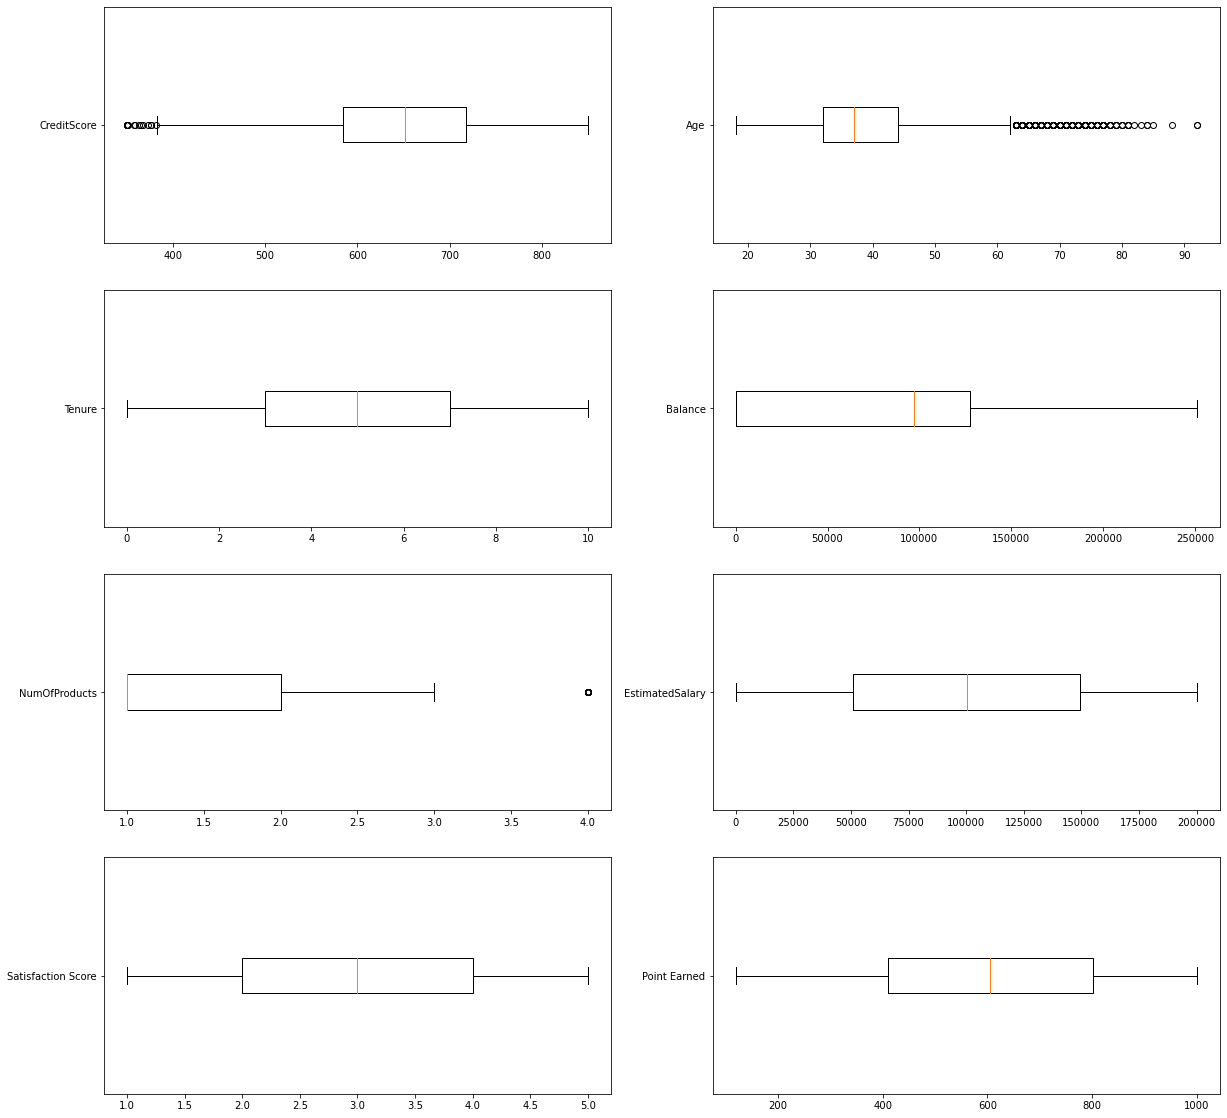

In [5]:
import math

#numerical
numerical = ds.loc[:, ~ds.columns.isin(['Geography', 'Gender', 'Card Type','HasCrCard','IsActiveMember','Exited','Complain'])]
display(numerical)

#data visualization-boxplot
row=math.ceil((len(numerical.columns))/2)
fig,ax=plt.subplots(nrows=row,ncols=2,figsize=(20, 20))

colums_name=numerical.columns
add_colum=0

for i in range(row):
    for j in range(2):
        ax[i,j].boxplot(numerical.iloc[:,add_colum],labels=[colums_name[add_colum]],vert=False)
        add_colum=add_colum+1
        
        if add_colum>=len(numerical.columns):
            break
    if add_colum>=len(numerical.columns):
        break
plt.show()

,Geography,Gender,Card Type,HasCrCard,IsActiveMember,Exited,Complain
0,France,Female,DIAMOND,1,1,1,1
1,Spain,Female,DIAMOND,0,1,0,1
2,France,Female,DIAMOND,1,0,1,1
3,France,Female,GOLD,0,0,0,0
4,Spain,Female,GOLD,1,1,0,0
...,...,...,...,...,...,...,...
9995,France,Male,DIAMOND,1,0,0,0
9996,France,Male,PLATINUM,1,1,0,0
9997,France,Female,SILVER,0,1,1,1
9998,Germany,Male,GOLD,1,0,1,1


4
Int64Index([1, 0], dtype='int64')


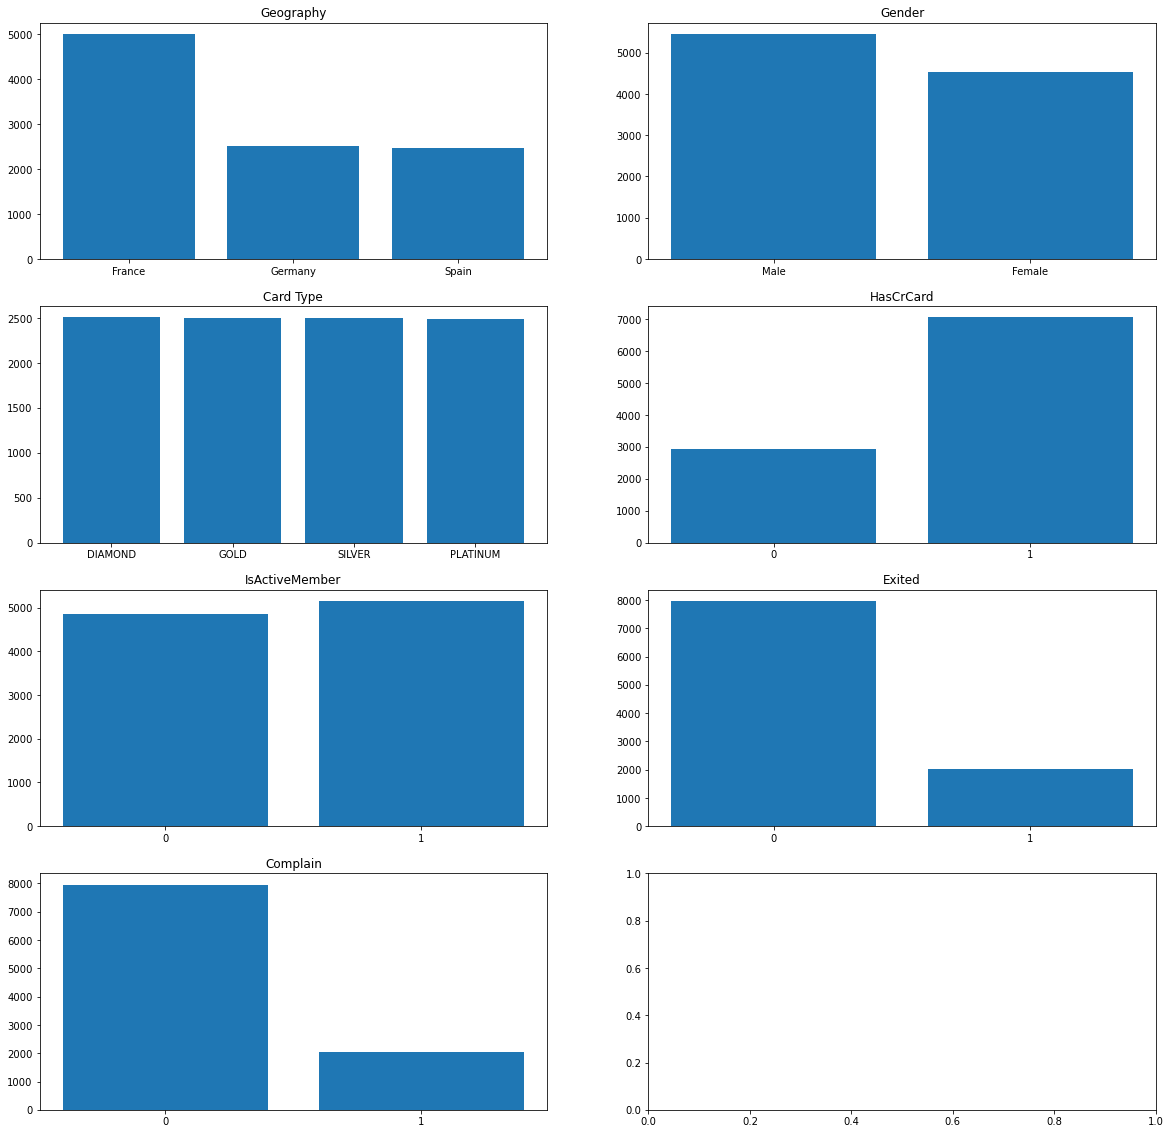

In [6]:
#category
category =  ds.loc[:, ['Geography', 'Gender', 'Card Type','HasCrCard','IsActiveMember','Exited','Complain']]
display(category)

#data visualization-histogram
row=math.ceil((len(category.columns))/2)
print(row)
fig1,ax1=plt.subplots(nrows=row,ncols=2,figsize=(20, 20))

colums_name=category.columns
add_colum=0

print(category.iloc[:,3].value_counts().index)

for i in range(row):
    for j in range(2):
        ax1[i,j].bar(category.iloc[:,add_colum].value_counts().index,category.iloc[:,add_colum].value_counts().values,tick_label=category.iloc[:,add_colum].value_counts().index)
        ax1[i,j].set_title(colums_name[add_colum])
        add_colum=add_colum+1
        if add_colum>=len(category.columns):
            break
    if add_colum>=len(category.columns):
        break

plt.show()
   


In [7]:
#handle category data using one hot encoding
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
import sklearn

pd.set_option('display.max_columns', None)

#identify category column
categorical = ds.select_dtypes(include=['object', 'category'])
print(categorical)


#for column in categorical.columns:
    #label=LabelEncoder()
    #ds[column]=label.fit_transform(ds[column])
    
ct = ColumnTransformer([("onehot", OneHotEncoder(),
     ['Gender', 'Geography', 'Card Type'])],remainder='passthrough')
ds=pd.DataFrame(ct.fit_transform(ds),columns=ct.get_feature_names_out())
#encoded_columns=ct.named_transformers_['onehot'].get_feature_names_out()
#ds=pd.DataFrame(ctds)
#np.set_printoptions(threshold=np.inf)
#s=pd.DataFrame(ctds,columns=ds.columns)
ds
#column = pd.get_dummies(ds.iloc[:,1])
#ds = pd.concat([ds,column],axis=1)

     Geography  Gender Card Type
0       France  Female   DIAMOND
1        Spain  Female   DIAMOND
2       France  Female   DIAMOND
3       France  Female      GOLD
4        Spain  Female      GOLD
...        ...     ...       ...
9995    France    Male   DIAMOND
9996    France    Male  PLATINUM
9997    France  Female    SILVER
9998   Germany    Male      GOLD
9999    France  Female   DIAMOND

[10000 rows x 3 columns]


,onehot__Gender_Female,onehot__Gender_Male,onehot__Geography_France,onehot__Geography_Germany,onehot__Geography_Spain,onehot__Card Type_DIAMOND,onehot__Card Type_GOLD,onehot__Card Type_PLATINUM,onehot__Card Type_SILVER,remainder__CreditScore,remainder__Age,remainder__Tenure,remainder__Balance,remainder__NumOfProducts,remainder__HasCrCard,remainder__IsActiveMember,remainder__EstimatedSalary,remainder__Exited,remainder__Complain,remainder__Satisfaction Score,remainder__Point Earned
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,1.0,2.0,464.0
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,1.0,3.0,456.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,1.0,3.0,377.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,5.0,350.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,5.0,425.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,771.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64,0.0,0.0,1.0,300.0
9996,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,516.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77,0.0,0.0,5.0,771.0
9997,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,709.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58,1.0,1.0,3.0,564.0
9998,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,772.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52,1.0,1.0,2.0,339.0


In [8]:
#handle missing value by imputer
from sklearn.impute import SimpleImputer
imputer=SimpleImputer (strategy='most_frequent')
imputer.fit_transform(ds)
ds

,onehot__Gender_Female,onehot__Gender_Male,onehot__Geography_France,onehot__Geography_Germany,onehot__Geography_Spain,onehot__Card Type_DIAMOND,onehot__Card Type_GOLD,onehot__Card Type_PLATINUM,onehot__Card Type_SILVER,remainder__CreditScore,remainder__Age,remainder__Tenure,remainder__Balance,remainder__NumOfProducts,remainder__HasCrCard,remainder__IsActiveMember,remainder__EstimatedSalary,remainder__Exited,remainder__Complain,remainder__Satisfaction Score,remainder__Point Earned
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,1.0,2.0,464.0
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,1.0,3.0,456.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,1.0,3.0,377.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,5.0,350.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,5.0,425.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,771.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64,0.0,0.0,1.0,300.0
9996,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,516.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77,0.0,0.0,5.0,771.0
9997,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,709.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58,1.0,1.0,3.0,564.0
9998,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,772.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52,1.0,1.0,2.0,339.0


In [9]:
#assign attributes and target
x=ds.loc[:, ds.columns != 'remainder__Exited'].values
y=ds.loc[:,'remainder__Exited'].values

#splitting dataset to train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#Standardization - Scale data to a standard normal distribution
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)

In [10]:
#train model use K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
classifier_knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier_knn.fit(x_train,y_train)

#predict
y_pred_knn=classifier_knn.predict(x_test)

#score
score_knn=classifier_knn.score(x_test,y_test)
score_knn
print(score_knn)
print('\n')

0.99




In [11]:
#train model use SVM
from sklearn.svm import SVC
classifier_svm=SVC(kernel='linear',random_state=0)
classifier_svm.fit(x_train,y_train)

#predict
y_pred_svm=classifier_svm.predict(x_test)

#score
score_svm=classifier_svm.score(x_test,y_test)
score_svm
print(score_svm)
print('\n')

0.9995




In [12]:
#KNN

#cofusion matrix
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,f1_score
cm_knn=confusion_matrix(y_test,y_pred_knn)
print("Confusion matrix:\n",cm_knn,'\n')

precision=precision_score(y_test, y_pred_knn)
recall=recall_score(y_test, y_pred_knn)
accuracy=accuracy_score(y_test, y_pred_knn)
f1=f1_score(y_test, y_pred_knn)

print('Precision:',precision,'\n')
print('Recall:',recall,'\n')
print('Accuracy:',accuracy,'\n')
print('F1:',f1,'\n')

Confusion matrix:
 [[1595    0]
 [  20  385]] 

Precision: 1.0 

Recall: 0.9506172839506173 

Accuracy: 0.99 

F1: 0.9746835443037974 



In [13]:
#SVM

#cofusion matrix
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,f1_score
cm_svm=confusion_matrix(y_test,y_pred_svm)
print("Confusion matrix:\n",cm_svm,'\n')

precision=precision_score(y_test, y_pred_svm)
recall=recall_score(y_test, y_pred_svm)
accuracy=accuracy_score(y_test, y_pred_svm)
f1=f1_score(y_test, y_pred_svm)

print('Precision:',precision,'\n')
print('Recall:',recall,'\n')
print('Accuracy:',accuracy,'\n')
print('F1:',f1,'\n')

Confusion matrix:
 [[1595    0]
 [   1  404]] 

Precision: 1.0 

Recall: 0.9975308641975309 

Accuracy: 0.9995 

F1: 0.9987639060568604 



In [14]:
#feature selection - filter method - ANOVA F-value - select N-1 best
from sklearn.feature_selection import SelectKBest, f_classif
x_col = pd.DataFrame(x, columns=ds.loc[:, ds.columns != 'remainder__Exited'].columns)
display(x_col)
x_col = pd.DataFrame(x_col, columns=x_col.iloc[:, 9:].columns)
display(x_col)

kbest = SelectKBest(score_func=f_classif, k=len(x_col.columns)-1)
k_data=kbest.fit_transform(x_col, y)
print(k_data.shape)



selected_index=kbest.get_support()
selected_feature_names=x_col.columns[selected_index]
print(selected_feature_names,'\n\n',selected_index)

x_col = x_col.iloc[:, selected_index]
x_col = pd.concat([x_col, ds.iloc[:, 0:9]], axis=1, ignore_index=False)
x_col

,onehot__Gender_Female,onehot__Gender_Male,onehot__Geography_France,onehot__Geography_Germany,onehot__Geography_Spain,onehot__Card Type_DIAMOND,onehot__Card Type_GOLD,onehot__Card Type_PLATINUM,onehot__Card Type_SILVER,remainder__CreditScore,remainder__Age,remainder__Tenure,remainder__Balance,remainder__NumOfProducts,remainder__HasCrCard,remainder__IsActiveMember,remainder__EstimatedSalary,remainder__Complain,remainder__Satisfaction Score,remainder__Point Earned
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,2.0,464.0
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,1.0,3.0,456.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,3.0,377.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,5.0,350.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,5.0,425.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,771.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64,0.0,1.0,300.0
9996,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,516.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77,0.0,5.0,771.0
9997,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,709.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58,1.0,3.0,564.0
9998,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,772.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52,1.0,2.0,339.0


,remainder__CreditScore,remainder__Age,remainder__Tenure,remainder__Balance,remainder__NumOfProducts,remainder__HasCrCard,remainder__IsActiveMember,remainder__EstimatedSalary,remainder__Complain,remainder__Satisfaction Score,remainder__Point Earned
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,2.0,464.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,1.0,3.0,456.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,3.0,377.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,5.0,350.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,5.0,425.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64,0.0,1.0,300.0
9996,516.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77,0.0,5.0,771.0
9997,709.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58,1.0,3.0,564.0
9998,772.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52,1.0,2.0,339.0


(10000, 10)
Index(['remainder__CreditScore', 'remainder__Age', 'remainder__Tenure',
       'remainder__Balance', 'remainder__NumOfProducts',
       'remainder__HasCrCard', 'remainder__IsActiveMember',
       'remainder__EstimatedSalary', 'remainder__Complain',
       'remainder__Satisfaction Score'],
      dtype='object') 

 [ True  True  True  True  True  True  True  True  True  True False]


,remainder__CreditScore,remainder__Age,remainder__Tenure,remainder__Balance,remainder__NumOfProducts,remainder__HasCrCard,remainder__IsActiveMember,remainder__EstimatedSalary,remainder__Complain,remainder__Satisfaction Score,onehot__Gender_Female,onehot__Gender_Male,onehot__Geography_France,onehot__Geography_Germany,onehot__Geography_Spain,onehot__Card Type_DIAMOND,onehot__Card Type_GOLD,onehot__Card Type_PLATINUM,onehot__Card Type_SILVER
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,1.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9996,516.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77,0.0,5.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9997,709.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58,1.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9998,772.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [15]:
#Retrain dataset

#assign attributes and target
x=x_col.values
y=ds.loc[:,'remainder__Exited'].values

#splitting dataset to train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#Standardization - Scale data to a standard normal distribution
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)


In [16]:
#train model use K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
classifier_knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier_knn.fit(x_train,y_train)

#predict
y_pred_knn=classifier_knn.predict(x_test)

#score
score_knn=classifier_knn.score(x_test,y_test)
score_knn
print(score_knn)
print('\n')

0.9935




In [17]:
#train model use SVM
from sklearn.svm import SVC
classifier_svm=SVC(kernel='linear',random_state=0)
classifier_svm.fit(x_train,y_train)

#predict
y_pred_svm=classifier_svm.predict(x_test)

#score
score_svm=classifier_svm.score(x_test,y_test)
score_svm
print(score_svm)
print('\n')

0.9995




In [18]:
#KNN after feature selection

#cofusion matrix
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,f1_score
cm_knn=confusion_matrix(y_test,y_pred_knn)
print("Confusion matrix:\n",cm_knn,'\n')

precision=precision_score(y_test, y_pred_knn)
recall=recall_score(y_test, y_pred_knn)
accuracy=accuracy_score(y_test, y_pred_knn)
f1=f1_score(y_test, y_pred_knn)

print('Precision:',precision,'\n')
print('Recall:',recall,'\n')
print('Accuracy:',accuracy,'\n')
print('F1:',f1,'\n')

Confusion matrix:
 [[1595    0]
 [  13  392]] 

Precision: 1.0 

Recall: 0.9679012345679012 

Accuracy: 0.9935 

F1: 0.9836888331242158 



In [19]:
#SVM after feature selection

#cofusion matrix
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,f1_score
cm_svm=confusion_matrix(y_test,y_pred_svm)
print("Confusion matrix:\n",cm_svm,'\n')

precision=precision_score(y_test, y_pred_svm)
recall=recall_score(y_test, y_pred_svm)
accuracy=accuracy_score(y_test, y_pred_svm)
f1=f1_score(y_test, y_pred_svm)

print('Precision:',precision,'\n')
print('Recall:',recall,'\n')
print('Accuracy:',accuracy,'\n')
print('F1:',f1,'\n')

Confusion matrix:
 [[1595    0]
 [   1  404]] 

Precision: 1.0 

Recall: 0.9975308641975309 

Accuracy: 0.9995 

F1: 0.9987639060568604 



In [22]:
result=classifier_svm.predict(sc_x.transform(np.array([[20,20,2,2000,2,1,1,2000,0,2,1,0,1,0,0,1,0,0,0]])))
result

array([0.])

In [ ]:
def try_predict(x_data):
    result=classifier_svm.predict(x_data)
    return result

In [ ]:
#Save model
import pickle
pickle.dump(classifier_svm,open('bank_churn_v1.pkl','wb'))